# LAB 2: Evaluating Generative Models

In this lab, we are going to practice how to evaluate generative models.
The evaluation method is not limited to diffusion models, in fact, deep generative models such as GAN and Flow use this method widely.

<span style="color:red">It is necessary to have a GPU to complete LAB2.</span><br>
<span style="color:red">Its efficacy will not affect your completion of this lab. Colab free plan also works.</span>

## Install Packages

Install `torch`, `torchvision` and `pytorch_gan_metrics`.

- Colab

    Use system default `torch` and `torchvision` to avoid hardware incompatibility.
    ```
    pip install pytorch_gan_metrics
    ```

- Custom environment (include `conda` users)

    Install all packages from pypi.
    ```
    pip install torch torchvision pytorch_gan_metrics
    ```

## Checkpoint 1 - Generating Fake Images
- Use `torch` to generate some noise as images.
- Use `torchvision.utils.save_image` to save `torch.Tensor` as an `png` image file.

In [1]:
import os
import torch
from torchvision.utils import save_image

num_images = 1000
os.makedirs('./images', exist_ok=True)
for i in range(num_images):
    image = torch.randn((3, 28, 28))  # random normal
    image = torch.clamp(image, min=-1, max=1)  # clamp [-1, 1]
    image = (image + 1) / 2  # shift [0 , 1]
    path = os.path.join(f'./images/{i:05d}.png')
    save_image(image, path)

## (Optional) Check the Number of Files in `./images` (Unix Only)
- The number of files should be 1000
- Note that the number of generated images in spec of HW3 is 10000.

In [2]:
!ls ./images | wc -l

1000


## Checkpoint 2 - Evaluate Generated Images in Console

1. Download `mnist.npz` from E3 [Homework 3 - Source Code](https://e3.nycu.edu.tw/mod/assign/view.php?id=329368).
2. Refer to the example in page 5 of `HW3.pdf`.
3. Calculate the FID between generated images in `./images` and our dataset (`mnist.npz`).

The calculated FID *must* be around $400$.

In [3]:
!python -m pytorch_gan_metrics.calc_metrics \
    --path ./images \
    --stats mnist.npz

1.208115861448908 0.0140026323908044 390.1258565489452                          


## Checkpoint 3 - Evaluate Generated Images at Runtime
- Use `torchvision.io.read_image` to load all images into memory one by one.
- Use `pytorch_gan_metrics.get_fid` to calculate FID between generated images in `./images` and our dataset (`mnist.npz`).

    The following is the document about how to use `get_fid` for reference.
    ```python
    from pytorch_gan_metrics import get_fid

    images = ...                                    # [N, 3, H, W] normalized to [0, 1]
    FID = get_fid(images, 'path/to/statistics.npz') # Frechet Inception Distance
    ```

The output FID should be the same as Checkpoint 2 (round to two decimal places).

In [4]:
from pytorch_gan_metrics import get_fid
from torchvision.io import read_image

images = []
for i in range(num_images):
    path = os.path.join(f'./images/{i:05d}.png')
    image = read_image(path) / 255.
    images.append(image)
images = torch.FloatTensor(torch.stack(images, dim=0))
FID = get_fid(images, 'mnist.npz')
print(f'{FID:.5f}')

390.12586


---

## Use `torchvision` to Save Grid Images

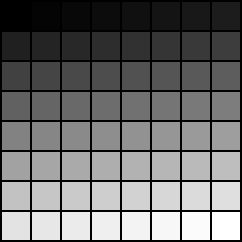

In [5]:
from IPython.display import Image, display

colors = torch.linspace(0, 1, 64)
images = colors.view(64, 1, 1, 1).expand(64, 3, 28, 28)
save_image(images, 'example.png')
display(Image(filename='example.png'))